## Importing all the required Python libraries
All necessary scientific Python libraries for data analysis, machine learning, and data visualization are imported, including:
- pandas and numpy for data manipulation
- matplotlib and seaborn for data visualization
- scikit-learn for modeling, operations and metrics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

After importing all the required Python libraries, dataset is loaded from the csv file (stars.csv).

In [4]:
data = pd.read_csv("/content/stars.csv")
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


## Data Validation
After successfully loading the dataset, it has to be validated by checking the null values, number of zeros or negative values. Besides, the shape and column names are also printed here.

In [5]:
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Missing values:\n")
print(data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']].isnull().sum()) # Check columns have no missing values
print("Basic statistics:\n")
print(data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']].describe())
print("Zeros or negatives:\n")
print((data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']] <= 0).sum())

Dataset shape: (240, 7)
Columns: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']
Missing values:

Temperature (K)     0
Luminosity(L/Lo)    0
Radius(R/Ro)        0
dtype: int64
Basic statistics:

       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)
count       240.000000        240.000000    240.000000
mean      10497.462500     107188.361635    237.157781
std        9552.425037     179432.244940    517.155763
min        1939.000000          0.000080      0.008400
25%        3344.250000          0.000865      0.102750
50%        5776.000000          0.070500      0.762500
75%       15055.500000     198050.000000     42.750000
max       40000.000000     849420.000000   1948.500000
Zeros or negatives:

Temperature (K)     0
Luminosity(L/Lo)    0
Radius(R/Ro)        0
dtype: int64


## Physics Verification (Stefan-Boltzmann Law)
After successful data validation, the dataset is analyzed whether it matches real-world physics expectations and principles.
The Pearson correlation coefficient between actual and theoretically calculated log-luminosity has been reported.  
If this correlation exceeds 0.90, it is taken as strong evidence that the data adheres to physical law and that subsequent predictive modeling is physically valid.  
A visualization is also provided to illustrate the relationship.

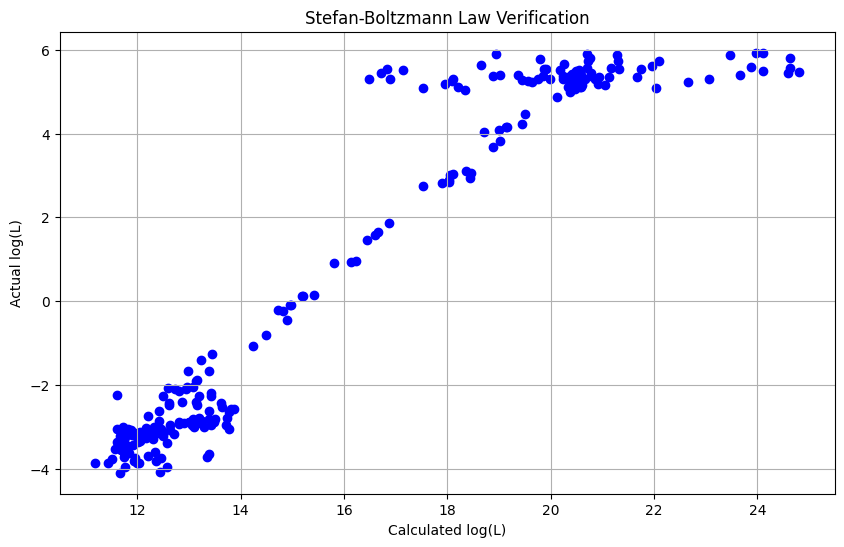


Correlation: 0.9581


In [7]:
data['log_luminosity'] = np.log10(data['Luminosity(L/Lo)'])
data['log_temp'] = np.log10(data['Temperature (K)'])
data['log_radius'] = np.log10(data['Radius(R/Ro)'])

data['log_L_theory_pred'] = 4 * data['log_temp'] + 2 * data['log_radius'] # Theoretical prediction of log(L)

plt.figure(figsize=(10, 6))
plt.xlabel('Calculated log(L)')
plt.ylabel('Actual log(L)')
plt.title('Stefan-Boltzmann Law Verification')
plt.scatter(data['log_L_theory_pred'], data['log_luminosity'], label='Comparison', color='blue')
plt.grid(True)
plt.show()

correlation = np.corrcoef(data['log_L_theory_pred'], data['log_luminosity'])[0, 1]
print(f"\nCorrelation: {correlation:.4f}")

## Feature/Target Preparation
```features``` and ```target``` are defined properly to train the model for prediction. The three primary features (temperature, luminosity and radius) have been selected as the basis for classification.  
The target variable ```Star type``` has been isolated for supervised learning.

In [8]:
features = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']]
target = data['Star type']

## Stratified Train/Test Split
The train and test sets have been constructed using stratified sampling to maintain class balance throughout the modeling process.  
Class distributions in both train and test splits have been tabulated to confirm that no class imbalances have been introduced.

In [9]:
feature_train, feature_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 42,
    stratify = target
)

print(f"Number of samples in the feature training set: {len(feature_train)}")
print(f"Number of samples in the feature testing set: {len(feature_test)}")

print(f"Number of samples in the target training set: {len(target_train)}")
print(f"Number of samples in the target testing set: {len(target_test)}")

print("\nTraining set distribution:")
print(target_train.value_counts().sort_index())
print("\nTest set distribution:")
print(target_test.value_counts().sort_index())

Number of samples in the feature training set: 192
Number of samples in the feature testing set: 48
Number of samples in the target training set: 192
Number of samples in the target testing set: 48

Training set distribution:
Star type
0    32
1    32
2    32
3    32
4    32
5    32
Name: count, dtype: int64

Test set distribution:
Star type
0    8
1    8
2    8
3    8
4    8
5    8
Name: count, dtype: int64


## Feature Scaling
Physical features are standardized using the training set statistics in order to improve the stability and convergence characteristics and stability of the model. The test set is standardized using the statistics based on the training set in order to prevent data leakage.

In [10]:
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

## Baseline Model (Logistic Regression)
A Logistic Regression model is trained and tested.
Classification accuracy and detailed metrics are printed, establishing a reference for nonlinear methods.

In [16]:
lr = LogisticRegression(max_iter=5000)
lr.fit(feature_train_scaled, target_train)
lr_preds = lr.predict(feature_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(target_test, lr_preds) * 100:.2f}%\n")
print("Classification Report:\n", classification_report(target_test, lr_preds))

Logistic Regression Accuracy: 70.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8
           2       0.62      1.00      0.76         8
           3       1.00      0.25      0.40         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           0.71        48
   macro avg       0.69      0.71      0.64        48
weighted avg       0.69      0.71      0.64        48


Confusion Matrix:
 [[8 0 0 0 0 0]
 [8 0 0 0 0 0]
 [0 0 8 0 0 0]
 [0 1 5 2 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


## Random Forest Model
Random Forest is trained and validated on precisely the same input pipeline.
Performance metrics are printed and used to demonstrate improvement over the baseline.

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(feature_train_scaled, target_train)
rf_pred = rf.predict(feature_test_scaled)

print(f"Random Forest Accuracy: {accuracy_score(target_test, rf_pred) * 100:.2f}%\n")
print("Classification Report:\n", classification_report(target_test, rf_pred))

Random Forest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



## Feature Importance of Random Forest
Feature importances according to Random Forest are plotted.
Relative contributions of temperature, luminosity, and radius to star type classification is visualized and interpreted.  
Physical relevance of these variables is discussed via the magnitude of their importances.

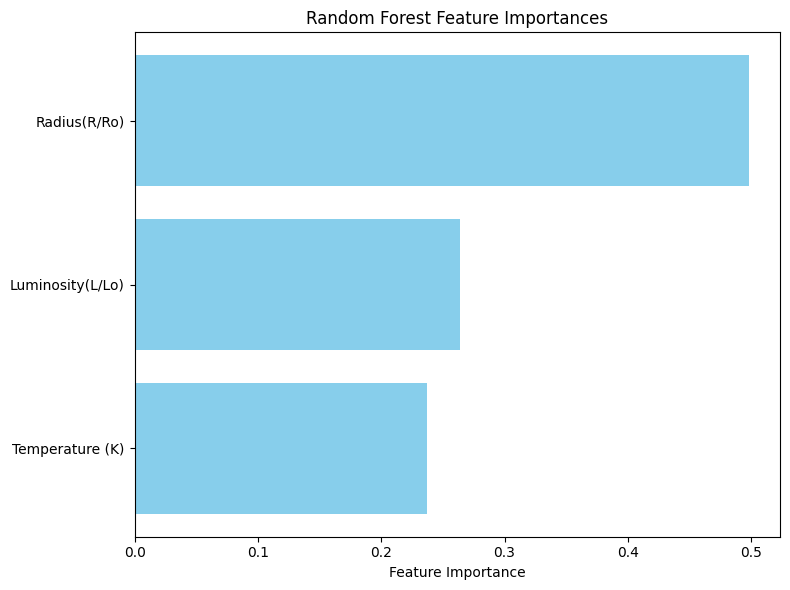

In [18]:
importances = rf.feature_importances_
feature_names = features.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

## Hertzsprung-Russell (HR) Diagram - True star types
Stars are plotted on an HR diagram, color-coded by their true type.
This shows the natural distribution of classes in the data, without using any model.

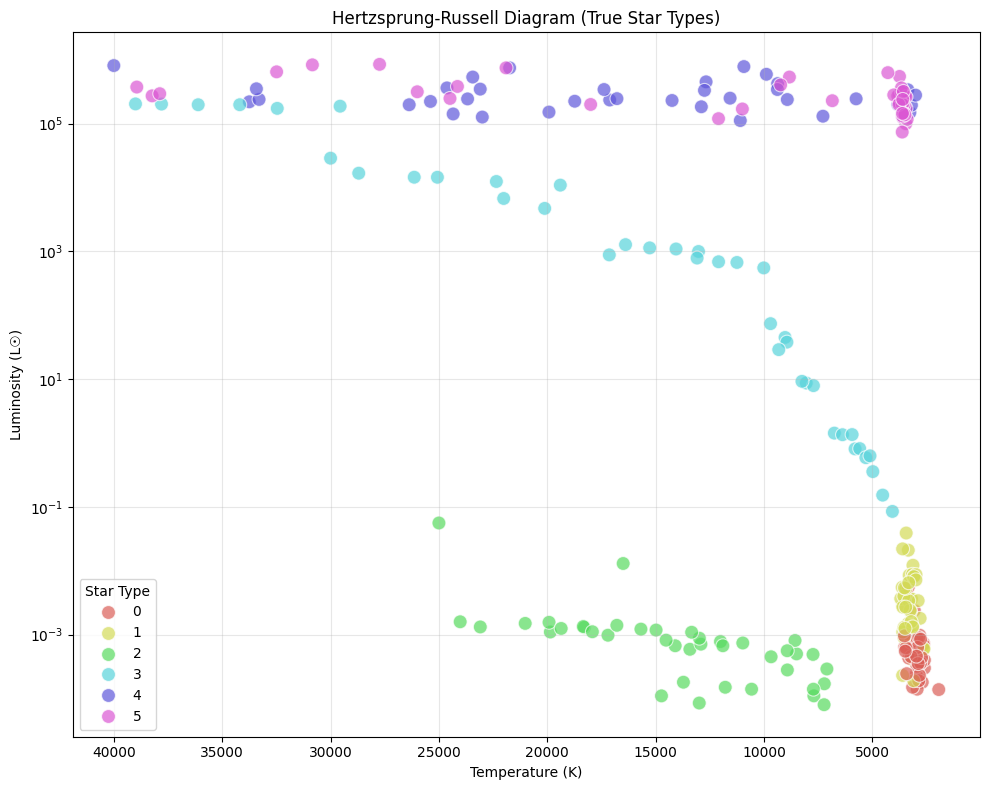

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Temperature (K)', y='Luminosity(L/Lo)',
    hue='Star type', palette=sns.color_palette("hls", 6),
    data=data, alpha=0.7, s=100
)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L☉)')
plt.title('Hertzsprung-Russell Diagram (True Star Types)')
plt.yscale('log')
plt.gca().invert_xaxis()  # Standard for HR diagrams
plt.legend(title='Star Type', loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## HR Diagram (Logistic Regression Prediction)
A plot is created using the predicted star types from the logistic regression model.

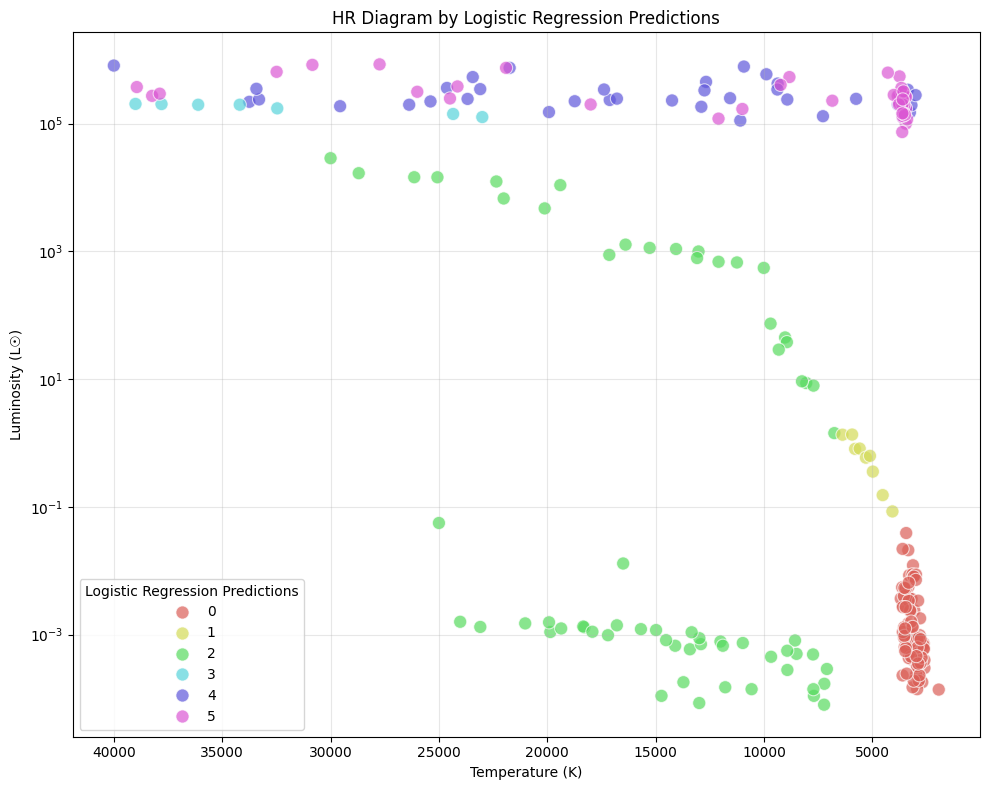

In [21]:
data['LR_Predicted_Type'] = lr.predict(scaler.transform(features))
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Temperature (K)', y='Luminosity(L/Lo)',
    hue='LR_Predicted_Type', palette=sns.color_palette("hls", 6),
    data=data, alpha=0.7, s=90
)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L☉)')
plt.title('HR Diagram by Logistic Regression Predictions')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend(title='Logistic Regression Predictions')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## HR Diagram (Random Forest Prediction)
Predicted class labels from the random forest model have been overplotted onto the HR diagram.  This figure is used to examine both the spatial distribution and the boundary learned by the model, which helps to further validate and interpret the results.

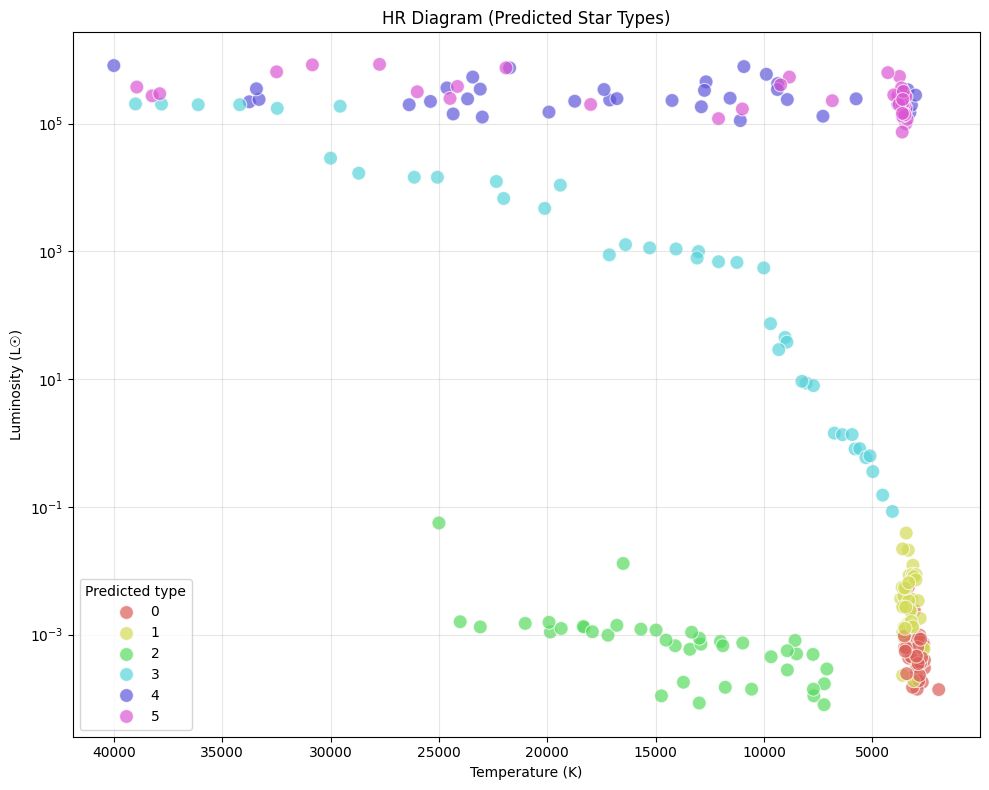

In [20]:
full_scaled = scaler.transform(features)
data['Predicted type'] = rf.predict(full_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Temperature (K)', y='Luminosity(L/Lo)',
    hue='Predicted type', palette=sns.color_palette("hls", 6), data=data, alpha=0.7, s=100
)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L☉)')
plt.title('HR Diagram (Predicted Star Types)')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend(title='Predicted type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing Logistic Regression and Random Forest Predictions
A side-by-side HR diagram comparison is shown: predictions from Logistic Regression (left) and Random Forest (right).

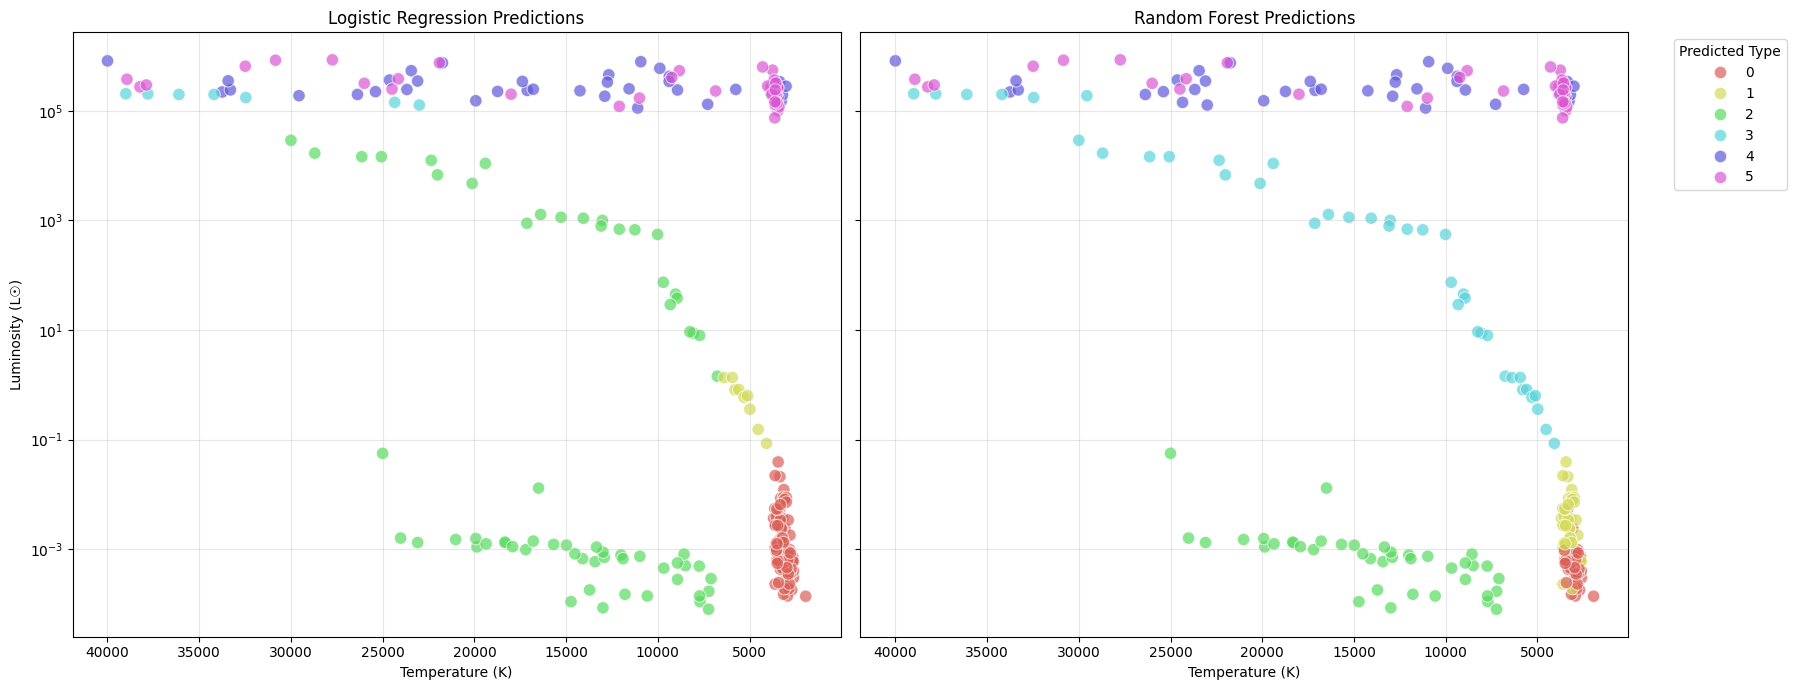

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

sns.scatterplot(
    x='Temperature (K)', y='Luminosity(L/Lo)',
    hue='LR_Predicted_Type', palette=sns.color_palette("hls", 6),
    data=data, alpha=0.7, s=80, ax=axes[0], legend=None
)
axes[0].set_title('Logistic Regression Predictions')
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Luminosity (L☉)')
axes[0].set_yscale('log')
axes[0].invert_xaxis()
axes[0].grid(alpha=0.3)

sns.scatterplot(
    x='Temperature (K)', y='Luminosity(L/Lo)',
    hue='Predicted type', palette=sns.color_palette("hls", 6),
    data=data, alpha=0.7, s=80, ax=axes[1]
)
axes[1].set_title('Random Forest Predictions')
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('')
axes[1].set_yscale('log')
axes[1].invert_xaxis()
axes[1].grid(alpha=0.3)
axes[1].legend(title='Predicted Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Conclusion
* Random Forest worked better than Logistic Regression because it handles complex patterns.  
* Temperature matters most for telling star types apart.  
* The plots show how the models make their decisions.